In [1]:
import pandas as pd
import chess
import numpy as np
from Utils.FuncionesEvaluacion.fun_eval import get_all_fun_eval
from Utils.Games.games_Kasparov import get_games_winner_kasparov
from middle_game import Middle_Game

In [2]:
games_winner_kasparov = get_games_winner_kasparov()

In [3]:
columnas = ["id_partida", "notacion_fen", "mejor_jugada"]
chess_df = pd.DataFrame(columns=columnas)

In [4]:
next_boards = []

for index, game in enumerate(games_winner_kasparov):
    jugadas = list(game.mainline_moves())
    cantidad_jugadas = len(jugadas)
    
    if game.headers['Black'].find("Kasparov") != -1: 
        jugadas_a_ejecutar = cantidad_jugadas // 2
        if jugadas_a_ejecutar % 2 == 0: jugadas_a_ejecutar -= 1

    if game.headers['White'].find("Kasparov") != -1: 
        jugadas_a_ejecutar = cantidad_jugadas // 2
        if jugadas_a_ejecutar % 2 == 1: jugadas_a_ejecutar -= 1        
    
    nuevo_tablero = chess.Board()
    for i in range(jugadas_a_ejecutar):
        nuevo_tablero.push(jugadas[i])

    jugada_a_predecir_algebraica = nuevo_tablero.san(jugadas[jugadas_a_ejecutar])
    
    chess_df.loc[len(chess_df)] = [index, nuevo_tablero.fen(), jugada_a_predecir_algebraica]

In [5]:
chess_df

,id_partida,notacion_fen,mejor_jugada
0,0,2rr4/4kppp/4p3/p1N1n3/1P6/5P2/P1P3PP/3R1RK1 w ...,c3
1,1,1r1q1rk1/pb2bpp1/1pnp1n1p/2p1p3/P3P1P1/2NPBN1P...,Nd4
2,2,6k1/4b1p1/p2pp2p/Pp2p3/4P3/1P3N1P/1P2RPPK/2r5 ...,Kf7
3,3,2rq1rk1/1p3p1p/p2pb1p1/3Np1b1/4P3/1P2N3/1PP2PP...,Kh1
4,4,r1br2k1/ppp1ppbp/4P1p1/4n3/6n1/2N2N2/PPP1BPPP/...,Nxe5
...,...,...,...
1070,1070,2r1r1k1/pp1b1p2/5q1p/3p2p1/1P1nn3/P3P1B1/1Q2BP...,exd4
1071,1071,5r2/pp3kp1/2p5/P2p1n1p/5P2/1PPN2P1/7P/4R1K1 w ...,Ne5+
1072,1072,2r3k1/5p1p/3b1Pp1/ppNPr3/1Pn5/P2R3P/2P3B1/3R2K...,a4
1073,1073,rr4k1/3b2p1/p3pp2/2Rn3P/1P5R/P4P2/3B1P2/4KB2 w...,Rd4


In [6]:
raa = chess.Board(chess_df["notacion_fen"][0])

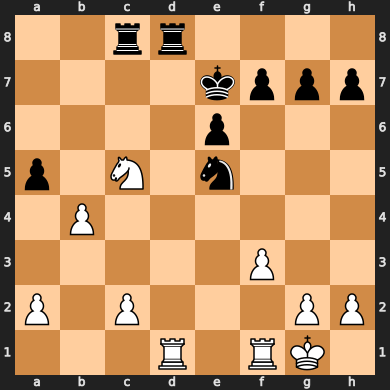

In [7]:
raa

In [8]:
raa.push_san(chess_df.mejor_jugada[0])

Move.from_uci('c2c3')

In [9]:
# chess_df.to_csv("../partidas_antes_de_jugar_kasparov.csv")

In [10]:
evaluaciones_df = pd.DataFrame(columns=["id_partida", "evaluacion", "fen_notation", "jugada"])

In [11]:
evaluaciones_df

,id_partida,evaluacion,fen_notation,jugada


In [12]:
for index, row in chess_df.iterrows():
    id_partida = row["id_partida"]
    current_board = chess.Board(row["notacion_fen"])
    
    for move in current_board.legal_moves:
        next_move = current_board.san(move)
        aux_board = current_board.copy()
        aux_board.push_san(next_move)
        evaluation_values = get_all_fun_eval(aux_board)
        evaluation_values_to_string_list = map(str, evaluation_values)
        evaluation_values_to_string = ','.join(evaluation_values_to_string_list)         
        evaluaciones_df.loc[len(evaluaciones_df)] = [id_partida, evaluation_values_to_string, aux_board.fen(), next_move]

In [13]:
evaluaciones_df

,id_partida,evaluacion,fen_notation,jugada
0,0,"5,1,0,2,0,0,0,5,0,0,1,0,0,4,0,5,1,0,13,0,0,1,1...",2rr4/3Nkppp/4p3/p3n3/1P6/5P2/P1P3PP/3R1RK1 b -...,Nd7
1,0,"5,1,0,2,0,0,0,2,0,0,1,0,0,4,0,5,1,0,13,0,0,1,1...",2rr4/1N2kppp/4p3/p3n3/1P6/5P2/P1P3PP/3R1RK1 b ...,Nb7
2,0,"5,1,0,2,0,0,0,6,0,0,0,1,0,4,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/4N3/p3n3/1P6/5P2/P1P3PP/3R1RK1 b - ...,Nxe6
3,0,"5,1,0,2,0,0,0,4,0,1,0,0,0,4,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/N3p3/p3n3/1P6/5P2/P1P3PP/3R1RK1 b -...,Na6
4,0,"5,1,0,2,0,0,0,8,1,0,0,0,1,4,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/4p3/p3n3/1P2N3/5P2/P1P3PP/3R1RK1 b ...,Ne4
...,...,...,...,...
40777,1074,"13,1,0,0,6,1,1,12,1,0,1,0,1,6,0,6,0,0,34,1,1,1...",4k2r/1b2b3/p2pppn1/1p2n1p1/2QNP1P1/P1N5/1PP2PB...,f6
40778,1074,"13,1,1,1,9,1,1,12,1,0,1,0,1,6,0,6,0,0,34,0,2,1...",4k2r/1b2bp2/p3p1n1/1p1pn1p1/2QNP1P1/P1N5/1PP2P...,d5
40779,1074,"12,1,0,1,8,1,1,12,2,0,1,0,1,6,0,6,0,0,34,1,1,1...",4k2r/1b2bp2/3pp1n1/pp2n1p1/2QNP1P1/P1N5/1PP2PB...,a5
40780,1074,"11,1,0,1,7,1,1,12,2,0,1,0,1,5,0,6,0,0,34,1,1,1...",4k2r/1b2bp2/p2pp1n1/4n1p1/1pQNP1P1/P1N5/1PP2PB...,b4


In [14]:
evaluaciones_df[evaluaciones_df.id_partida == 0]

,id_partida,evaluacion,fen_notation,jugada
0,0,"5,1,0,2,0,0,0,5,0,0,1,0,0,4,0,5,1,0,13,0,0,1,1...",2rr4/3Nkppp/4p3/p3n3/1P6/5P2/P1P3PP/3R1RK1 b -...,Nd7
1,0,"5,1,0,2,0,0,0,2,0,0,1,0,0,4,0,5,1,0,13,0,0,1,1...",2rr4/1N2kppp/4p3/p3n3/1P6/5P2/P1P3PP/3R1RK1 b ...,Nb7
2,0,"5,1,0,2,0,0,0,6,0,0,0,1,0,4,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/4N3/p3n3/1P6/5P2/P1P3PP/3R1RK1 b - ...,Nxe6
3,0,"5,1,0,2,0,0,0,4,0,1,0,0,0,4,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/N3p3/p3n3/1P6/5P2/P1P3PP/3R1RK1 b -...,Na6
4,0,"5,1,0,2,0,0,0,8,1,0,0,0,1,4,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/4p3/p3n3/1P2N3/5P2/P1P3PP/3R1RK1 b ...,Ne4
5,0,"5,1,0,2,0,0,0,4,0,1,0,0,0,5,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/4p3/p3n3/NP6/5P2/P1P3PP/3R1RK1 b - ...,Na4
6,0,"5,1,0,2,0,0,0,7,1,0,0,1,0,4,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/4p3/p3n3/1P6/3N1P2/P1P3PP/3R1RK1 b ...,Nd3
7,0,"5,1,0,2,0,0,0,5,1,0,1,0,0,6,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/4p3/p3n3/1P6/1N3P2/P1P3PP/3R1RK1 b ...,Nb3
8,0,"5,1,0,2,0,0,0,7,1,0,0,1,0,5,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/4p3/p1N1n3/1P6/5P2/P1P2KPP/3R1R2 b ...,Kf2
9,0,"5,1,0,2,0,0,0,7,1,0,0,1,0,5,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/4p3/p1N1n3/1P6/5P2/P1P3PP/3R1R1K b ...,Kh1


In [15]:
def producto_interno(evaluacion, individuo):
    return  sum([x*y for x,y in zip(evaluacion, individuo)])

In [16]:
partida_inicial_posibles_resultados = evaluaciones_df[evaluaciones_df.id_partida == 0]

In [17]:
partida_inicial_posibles_resultados

,id_partida,evaluacion,fen_notation,jugada
0,0,"5,1,0,2,0,0,0,5,0,0,1,0,0,4,0,5,1,0,13,0,0,1,1...",2rr4/3Nkppp/4p3/p3n3/1P6/5P2/P1P3PP/3R1RK1 b -...,Nd7
1,0,"5,1,0,2,0,0,0,2,0,0,1,0,0,4,0,5,1,0,13,0,0,1,1...",2rr4/1N2kppp/4p3/p3n3/1P6/5P2/P1P3PP/3R1RK1 b ...,Nb7
2,0,"5,1,0,2,0,0,0,6,0,0,0,1,0,4,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/4N3/p3n3/1P6/5P2/P1P3PP/3R1RK1 b - ...,Nxe6
3,0,"5,1,0,2,0,0,0,4,0,1,0,0,0,4,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/N3p3/p3n3/1P6/5P2/P1P3PP/3R1RK1 b -...,Na6
4,0,"5,1,0,2,0,0,0,8,1,0,0,0,1,4,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/4p3/p3n3/1P2N3/5P2/P1P3PP/3R1RK1 b ...,Ne4
5,0,"5,1,0,2,0,0,0,4,0,1,0,0,0,5,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/4p3/p3n3/NP6/5P2/P1P3PP/3R1RK1 b - ...,Na4
6,0,"5,1,0,2,0,0,0,7,1,0,0,1,0,4,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/4p3/p3n3/1P6/3N1P2/P1P3PP/3R1RK1 b ...,Nd3
7,0,"5,1,0,2,0,0,0,5,1,0,1,0,0,6,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/4p3/p3n3/1P6/1N3P2/P1P3PP/3R1RK1 b ...,Nb3
8,0,"5,1,0,2,0,0,0,7,1,0,0,1,0,5,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/4p3/p1N1n3/1P6/5P2/P1P2KPP/3R1R2 b ...,Kf2
9,0,"5,1,0,2,0,0,0,7,1,0,0,1,0,5,0,5,1,0,13,0,0,1,1...",2rr4/4kppp/4p3/p1N1n3/1P6/5P2/P1P3PP/3R1R1K b ...,Kh1


In [18]:
def evaluacion_string_a_lista(evaluacion_string):
    return list(map(int, list(evaluacion_string.split(","))))

In [19]:
evaluacion_string_a_lista(partida_inicial_posibles_resultados["evaluacion"][0])

[5,
 1,
 0,
 2,
 0,
 0,
 0,
 5,
 0,
 0,
 1,
 0,
 0,
 4,
 0,
 5,
 1,
 0,
 13,
 0,
 0,
 1,
 1,
 1,
 0,
 11,
 1,
 0,
 6,
 1,
 0,
 0,
 2]

In [21]:
evaluaciones_df.to_csv("../evaluaciones_posibles_movidas_por_partida_reparado.csv")